# **Google Professional Certificate Capstone Project 1**
**Case Study**: How Does a Bike-Share Navigate Speedy Success?

 **Sources of Data**:
     
   The data for analysis has been made available by **Motivate International Inc.**

## Business questions for future marketing programs 
The following questions are the questions which will the main focus of the analysis

- How do annual members and casual riders use Cyclistic bikes differently?

- Why would casual riders buy Cyclistic annual memberships?

- How can Cyclistic use digital media to influence casual riders to become members?


In [2]:
import pandas as pd
import numpy as np
import os
from glob import glob

## 1. Aggregation of year 2020's data

- First we are taking all the 12 files

- This 12 files represent data of each month

- We are concatenating the files and saving it in Total_df.csv file

In [3]:
files = glob('Location of the files in the file system')

data_frames = []

for i in range(20):
    csv_file = pd.read_csv(files[i])
    df = pd.DataFrame(csv_file)
    data_frames.append(df)

**In the above cell I've written "Location of the files in the file system" in place of the actual location for privacy reasons**

In [4]:
Total_df = pd.concat(data_frames)

## 2. Processing the data for cleaning purposes

- We are finding out if any column of the Total_df dataframe has null values

In [5]:
Total_df.isna().any() # This code will return true for any column if it has at least one null value else, it will return false

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

- We are dropping all the records with null values

In [6]:
Total_df.dropna(inplace=True) # This code will drop all the records with null values


## 3. Analyzing the data


### 3.1 Day of week and Duration of ride analysis
We are trying to find out the difference in consistency in ride duration for member and casual riders for differenct days of the week. 

#### 3.1.1 Finding out the ride lengths for each trips (trip duration of each trip)

- First, We are finding out the ride lengths of each trip by subtracting the started_at column from the ended_at column 

- Second, We are adding the ride length values into a new column in the data frame with the name ride_length

In [8]:
Total_df['ride_length'] =  pd.to_datetime(Total_df['ended_at']).subtract(pd.to_datetime(Total_df['started_at']))



#### 3.1.2 Finding out the day of the week in which the trip was done

- First, We are using a property to convert the datetimes in started_at column to days of the week
    
    - We will be seeing the days as integers ranging from 0 to 6 
        - 0 : Monday
        - 1 : Tuesday 
        - 2 : Wednesday
        - 3 : Thursday
        - 4 : Friday
        - 5 : Saturday
        - 6 : Sunday
        
- Second, We will be adding the numerical representation values of days of week to a new created column named day_of_week



In [9]:
day_of_week_series = pd.to_datetime(Total_df['started_at']) # getting the date values from the started_at 
                                                            # column

In [10]:
Total_df['day_of_week'] = day_of_week_series.dt.dayofweek # getting the numerical representations of the date in the day_of_week
                                                          # column

 - **Central tendency and dispersion of the ride_length column**

In [11]:
ride_length_describe = Total_df['ride_length'].describe()

**For Privacy Reasons I've not provided the output of of the above method**

- **Pivot table representation of the ride_length data**

In [12]:
pivot_table_1 = Total_df.pivot_table(index="member_casual", columns="day_of_week", values="ride_length", aggfunc="mean")


<b> In the above table we can see the day_of_week in as the columns and rider types as the rows </b>

- The values are the mean ride_length of the casual and member riders per day of wee

**For Privacy Reasons I've not provided the output of of the pivot table**

In [13]:
chart_df = pd.DataFrame(pivot_table_1.median(axis=1)).T


#### The above data shows the Standard Deviations of Casual riders and Member riders ride lengths

We can see the average ride length for casual riders accross the week is higher than the member riders.

**For Privacy Reasons I've not provided the output of of the Dataframe**

In [14]:
pivot_table_2 = Total_df.pivot_table(index="member_casual", columns="day_of_week", values="ride_id", aggfunc="count")

**In the above table we can see the day_of_week as the columns and rider types as the rows**

We are getting count of ride ids for casual and members in different days of the week which gives us the number of trips made by casual and members in different days of the week

From the above table we can see the number of trips for casual riders increase in the 'Friday', 'Saturday' and 'Sundays'. 

**For Privacy Reasons I've not provided the output of of the pivot table**

In [19]:
chart_df_2 = pd.DataFrame(pivot_table_2.std(axis=1)).T
casual_std = str(chart_df_2['casual'])
casual_std = casual_std.split(' ')
casual_std = casual_std[4].split('\n')
member_std = str(chart_df_2['member'])
member_std = member_std.split(' ')
member_std = member_std[4].split('\n')

standard_deviation_casual_rides = 'The standard deviation of number of casual rides - ' + casual_std[0]

In [18]:
standard_deviation_member_rides = 'The standard deviation of number of member rides - ' + member_std[0]

The standard deviation of number of casual rides is higher than the number of member rides which means the number of rides by members are more cosistent throughout the week.

### 3.2 Finding out the Non-member daily-commuters
The following analysis will show how on certain stations the arrival of the bikes are more frequent for member riders, and how those stations are located in city areas. Finding the frequency of visit for each of those stations, taking into account only the rides made during the commute hours, it indicates that those rides were for purposes of commute.

These commute destinations for the members also have a high frequency of non-member riders. These users are the primary users who can be converted into members.



#### 3.2.1 Filtering out the data
In this step, we are going to filter out the rows where the rides that were not made during the **commute time**. 

The **Commute Time** is assumed to be between 08:00:00 and 12:00:00 in the morning.

In [20]:

from datetime import datetime
trip_start_time = pd.to_datetime(Total_df['started_at'])
trip_start_time = trip_start_time.dt.time
Total_df['trip_start_time'] = trip_start_time




var1 = datetime(1, 1, 1, 8, 0)
var1 = var1.time()

var2 = datetime(1, 1, 1, 12, 0)
var2 = var2.time()
Total_df = Total_df.query('trip_start_time >= @var1')
Total_df = Total_df.query('trip_start_time <= @var2')

Here we are creating a subset of the dataframe with the columns lng(end_lng), lat(end_lat), and destination_name(end_station_name); and dropping the duplicate records by end_station_name.

In [21]:
sub_df = Total_df[['end_lng', 'end_lat', 'end_station_name']]
end_stations_table = sub_df.drop_duplicates('end_station_name', keep='first')


end_stations_table.rename(columns={'end_station_name': 'destination_name', 'end_lat': 'lat', 'end_lng': 'lng'}, inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


#### 3.2.2 Creating the frequency distribution
In The code below, we're creating a frequency distribution for each place based on the casual and member rider visits. That means, every station is listed on the table with their corresponding frequency of **visit** by members and casuals (shown in different columns) between the commute hours. 

Here **Visit** of a station is the number of rides taken to that place (the place therein has to be the destination). 

In [22]:

freq_dist_casual = Total_df.query('member_casual == "casual"').groupby(['end_station_name']).size()
freq_dist_member = Total_df.query('member_casual == "member"').groupby(['end_station_name']).size()

freq_dist_casual = pd.DataFrame({'destination_name':freq_dist_casual.index, 'frequency_casual': freq_dist_casual.values})
merged_dataframe = pd.merge(end_stations_table, freq_dist_casual, left_on='destination_name', right_on='destination_name', how='outer')

freq_dist_member = pd.DataFrame({'destination_name':freq_dist_member.index, 'frequency_member':freq_dist_member.values})
merged_dataframe = pd.merge(merged_dataframe, freq_dist_member, on='destination_name', how='outer')
merged_dataframe = merged_dataframe.fillna(0)

#### 3.2.3 Sorting the table in desceding order of casual user's frequencies

In [23]:
from matplotlib import pyplot as plt
sorted_table_casual = merged_dataframe.sort_values(['frequency_casual'], ascending=False)

sorted_table_casual = pd.DataFrame(sorted_table_casual[['frequency_casual', 'destination_name']].reset_index())
sorted_table_casual = sorted_table_casual.drop(['index'], axis=1)
sorted_table_casual = sorted_table_casual.fillna(0)

#### 3.2.3 Sorting the table in descending order of member user's frequencies and plotting it

In [27]:
from matplotlib import pyplot as plt
sorted_table_member = merged_dataframe.sort_values(['frequency_member'], ascending=False)

sorted_table_member = pd.DataFrame(sorted_table_member[['frequency_member', 'frequency_casual', 'destination_name']].reset_index())
sorted_table_member = sorted_table_member.drop(['index'], axis=1)

Text(0, 0.5, 'Frequency')

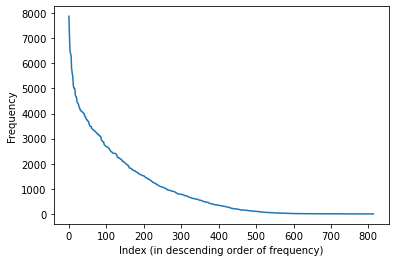

In [28]:
plt.plot(sorted_table_member.index.values, sorted_table_member['frequency_member'])
plt.xlabel('Index (in descending order of frequency)')
plt.ylabel('Frequency')


$$Frequency of Casual User / Frequency of Member*100$$

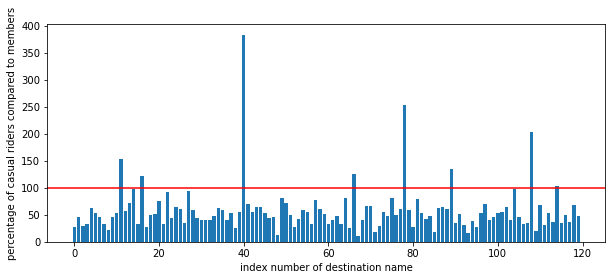

In [29]:
sorted_table_member = sorted_table_member.head(120)
ratio_casual_member = sorted_table_member['frequency_casual']/sorted_table_member['frequency_member'] * 100

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)
plt.bar(ratio_casual_member.index.values, ratio_casual_member.values)
plt.xlabel('index number of destination name')
plt.ylabel('percentage of casual riders compared to members')
plt.axhline(y=100, color='r', linestyle='-')



In [30]:
stdev_ratio_casual_member = ratio_casual_member.std()

Text(0, 0.5, 'count')

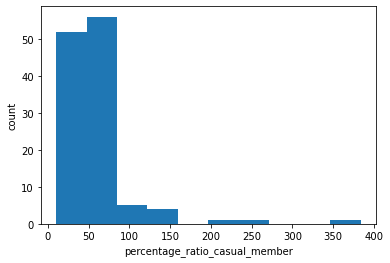

In [31]:
plt.hist(ratio_casual_member)
plt.xlabel('percentage_ratio_casual_member')
plt.ylabel('count')

In the above figure we have made a histogram plot which expresses the number of times that a particular **percentage value** exists in the percentage_ratio_casual_member dataframe in Y-axis. And in the X-axis we are expressing the **percentage values**.

We can see from the above plot that the percentage values above 100 are lesser than 20% of the highest value in the Y-axis. So, we are cosidering the percentage values above 100 as outliers to the dataset and removing them.

In [32]:
filtered_ratio_casual_member = []
for i in range(len(ratio_casual_member)):
    if ratio_casual_member[i] <= 100:
        filtered_ratio_casual_member.append(ratio_casual_member[i])

filtered_ratio_casual_member = pd.DataFrame(filtered_ratio_casual_member)
avg_filtered_ratio_casual_member = filtered_ratio_casual_member[0].mean()
median_filtered_ratio_casual_member = filtered_ratio_casual_member[0].median()
difference = filtered_ratio_casual_member[0].mean() - filtered_ratio_casual_member[0].median()
difference_percentage = difference/filtered_ratio_casual_member[0].median() * 100
mode_filtered_ratio_casual_member = filtered_ratio_casual_member[0].mode()

<b> We can see that after removing the outliers from the dataset we get the mean and median of the dataset and which is close to each other (mean is 1.06% higher in value compared to median)</b>

So, we can conclude that the dataset is having a good degree of uniformity.

Now, since **48%** (after rounding off) is the mean of the dataset, then we can conclude that on an average the number of casual riders visiting to the place where the members visit is 48% of the number of members. So, **there can be a 48% increment in the number of memberships from the casual riders**.  

In [33]:
ratio_casual_casual = sorted_table_member['frequency_casual'].sum()/merged_dataframe['frequency_casual'].sum() * 100
percentage_prospective_members = 'percentage of prospective members out of the casual riders - ' + str(ratio_casual_casual) + ' %'

<b>The number of casual riders visiting to the places which are most visited ones for the members is 53% (rounded off) of the total number of casual riders.</b> 

### 3.3 Finding out the round trips

In [34]:
Total_df = Total_df.reset_index()
Total_df = Total_df.drop(['index'], axis=1)

In [35]:
filtered_df = Total_df.query('start_station_name == end_station_name')
round_trips_member_riders = 'The number of round trips for member riders - ' + str(filtered_df.query('member_casual == "member"')['ride_id'].count())

In [36]:
round_trips_casual_riders = 'The number of round trips for casual riders - ' + str(filtered_df.query('member_casual == "casual"')['ride_id'].count())

In the above cells we can see the number of round trips for member and casual riders. The Total_df data has been filtered by the start time of the trips, so the trips starting at 8 am to 12 pm in the day are only existing here. 


In [37]:
percent_member_rides = filtered_df.query('member_casual == "member"')['ride_id'].count()/Total_df.query('member_casual == "member"')['ride_id'].count() * 100
percentage_member_round_trips = 'The percentage of member round trips ' + str(percent_member_rides)

In [38]:
percent_casual_rides = filtered_df.query('member_casual == "casual"')['ride_id'].count()/Total_df.query('member_casual == "casual"')['ride_id'].count() * 100
percentage_casual_round_trips = 'The percentage of casual round trips ' + str(percent_casual_rides)

## Summary

**1.** The member users use the bikes throughout the week more consistently in terms of number of trips compared to the casuals. 

**2.** We can see a rise in the number of trips for the casual users in Friday, Saturday and Sundays.

In [39]:
df_pivot_table_2 = pd.DataFrame(pivot_table_2)

In [40]:
casual_ride_count = []
for i in range(7):
    casual_ride_count.append(df_pivot_table_2[i][0])


In [41]:
member_ride_count = []
for i in range(7):
    member_ride_count.append(df_pivot_table_2[i][1])

#### The plot below shows the number of trips done by casual riders in different days of the week throughout 12 months

Text(0, 0.5, 'Number of Rides')

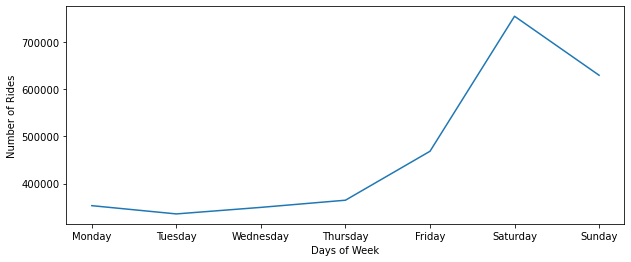

In [42]:

f = plt.figure()
f.set_figheight(4)
f.set_figwidth(10)
plt.plot(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], casual_ride_count)
plt.xlabel('Days of Week')
plt.ylabel('Number of Rides')

#### The plot below shows the number of trips done by member riders in different days of the week throughout 12 months

Text(0, 0.5, 'Number of Rides')

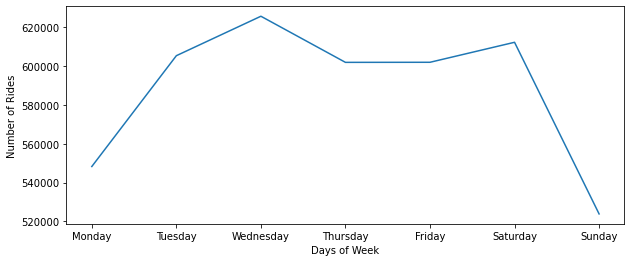

In [43]:
f = plt.figure()
f.set_figheight(4)
f.set_figwidth(10)
plt.plot(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], member_ride_count)
plt.xlabel('Days of Week')
plt.ylabel('Number of Rides')

We can conclude from the above plots for that the number of rides by casual riders increase in the Saturdays and Sundays where the number of rides by the member riders decrease in the Mondays and Sundays but is higher and consistent in the week days.

*So, my first assumption would be that the member riders use the bikes for daily commute purposes whereas casual riders use this for leisure activities.*

**3.** From the section ***3.1*** we can see analysis of the ride duration per trip for the casual and member riders.

In [44]:
plt_df = []
column_names = ['casual', 'member']
for i in range(0, 2):
    values = column_names[i]
    plt_df.append(str(chart_df[values][0]))

avg_ride_duration_casual = 'average of casual riders ride durations  - ' + plt_df[0]

In [45]:
avg_ride_duration_member = 'average of member riders ride durations  - ' + plt_df[1]

We can see that the average duration of usage of rides by the member riders is lesser than casual riders.

**4.** The analysis at point ***3.2.3*** shows that 53% of the casual riders visit to the places where the member riders visit. So, our target customers can be this 53% which can provide us a maximum of 48% increment(refer point ***3.2.3***) from the present number of memberships.

**5.** We can see in ***3.3*** about 4.95% of the trips made by member are round trips and 13.06% of the trips made by casual riders are round trips.

The causes of round trips - 
- Small distant local transport 
- Exercise

## Recommendations

**1.** Advertisements should be run to promote the daily commute usage of the bikes.

**2.** Since the median of ride durations for casual riders is higher, we can conclude for the most of the cases the casual riders travel a larger distance. Facilities should be made for larger distance bike rides.
